# Source-Filter NMF and CRNN Evaluation Analysis with MedleyDB

## Comparison between the annotations and the estimations

### Here the aim is to compare the annotations and the estimations in the same plot to be able to observe the common errors.

<IPython.core.display.Javascript object>


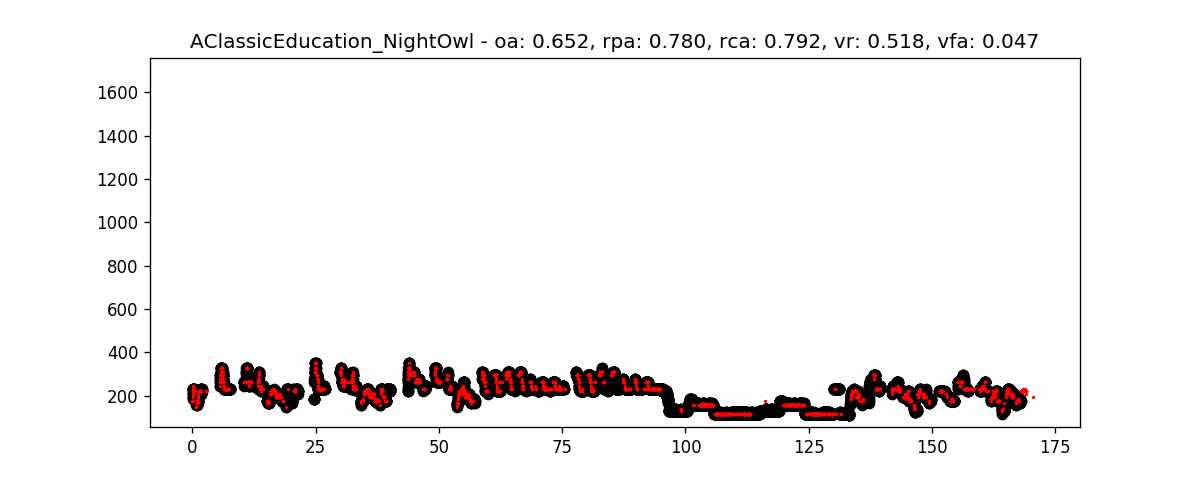

In [2]:
import glob
import ipywidgets as widgets
import os
import matplotlib.pyplot as plt
import numpy as np

import sys

from utils import get_annotation_and_estimation, get_track_list, get_plt_title

%matplotlib notebook

def plot_annotation_vs_estimation(plot_annotation_vs_estimation_widget):
    annotation, pitch_estimation = get_annotation_and_estimation(track_name=track_list_widget.value)
                                                                 
    data_length = np.min((len(annotation), len(pitch_estimation)))
    time_index = np.arange(data_length) * 256./22050
    
    plt.figure('Comparison', figsize = [10,4]),plt.gcf().clf()
    plt.plot(time_index, annotation[:data_length], 'o', color='black', markersize=6),
    plt.plot(time_index, pitch_estimation[:data_length], '.', color='red', markersize=2),
    plt.ylim((55,1760))
    plt.title(get_plt_title(track_name=track_list_widget.value))
    plt.show()

estimated_track_list = get_track_list()

track_list_widget = widgets.Select(options=estimated_track_list,
                                   value=estimated_track_list[0],
                                   description='Track List',
                                   font_size = 14, layout={"width":"50%"})
plot_annotation_vs_estimation_widget = widgets.Button(description='Plot', button_style='danger')
plot_annotation_vs_estimation_widget.on_click(plot_annotation_vs_estimation)

# Container that contains all widgets
container1 = widgets.HBox(children=[track_list_widget,plot_annotation_vs_estimation_widget])

display(container1)
plt.figure('Comparison', figsize = [10,4])
plt.show()




### The confusion matrix for each individual track in the test set

<IPython.core.display.Javascript object>


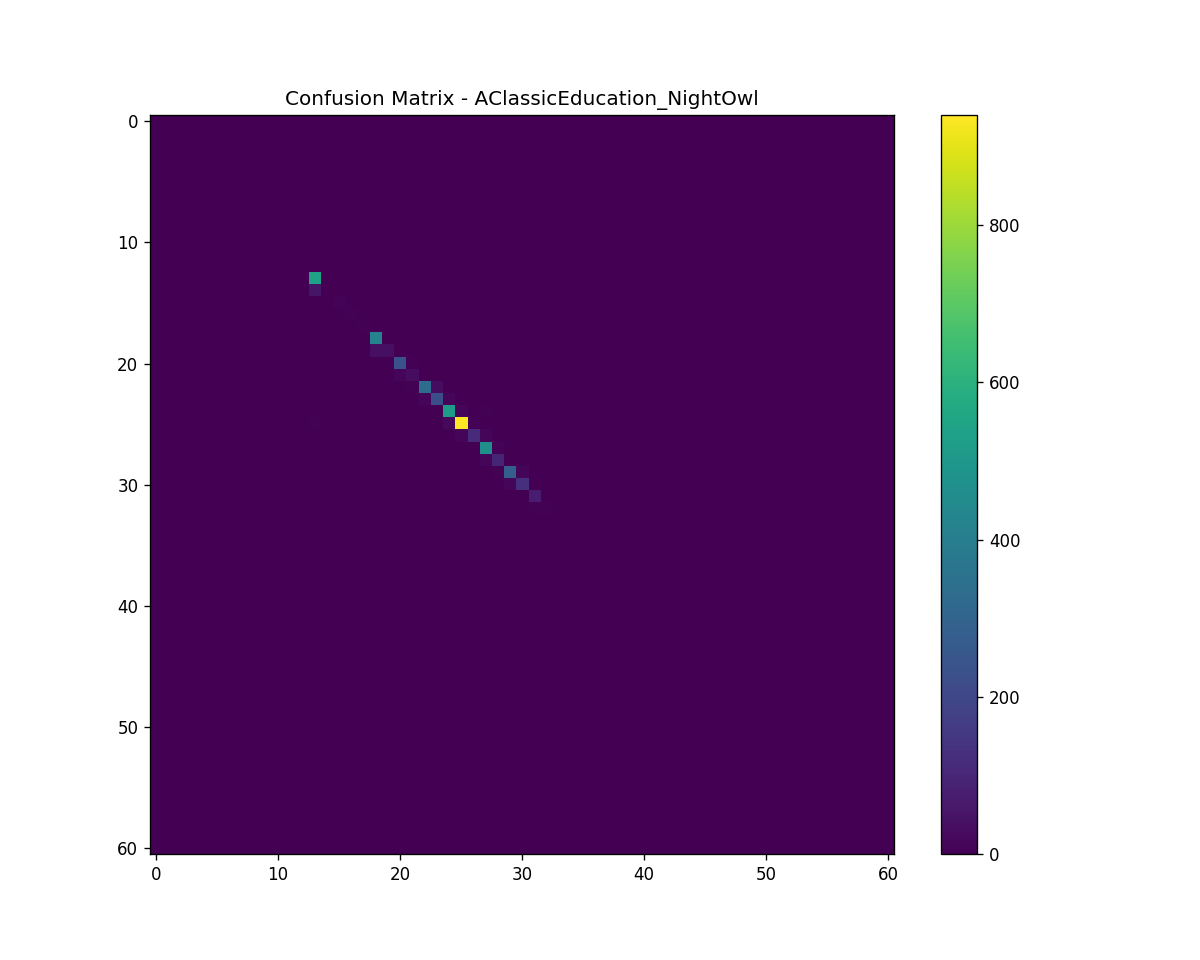

In [3]:
from utils import get_single_track_confusion_matrix

def plot_single_track_confusion_matrix(plot_single_track_confusion_matrix_widget):
    confusion_matrix_single_track = get_single_track_confusion_matrix(track_name=track_list_widget.value)
    plt.figure('Confusion Matrix Single Track', figsize = [10,8]),plt.gcf().clf()
    plt.imshow(confusion_matrix_single_track[1:,1:], interpolation='nearest', aspect='auto'), plt.colorbar()
    plt.title('Confusion Matrix - {0}'.format(track_list_widget.value))
    plt.show()
    
plot_single_track_confusion_matrix_widget = widgets.Button(description='Plot Confusion Matrix', button_style='danger')
plot_single_track_confusion_matrix_widget.on_click(plot_single_track_confusion_matrix)

# Container that contains all widgets
container2 = widgets.HBox(children=[track_list_widget,plot_single_track_confusion_matrix_widget])

display(container2)
plt.figure('Confusion Matrix Single Track', figsize = [10,8])
plt.show()



### The confusion matrix for the whole test set

<IPython.core.display.Javascript object>


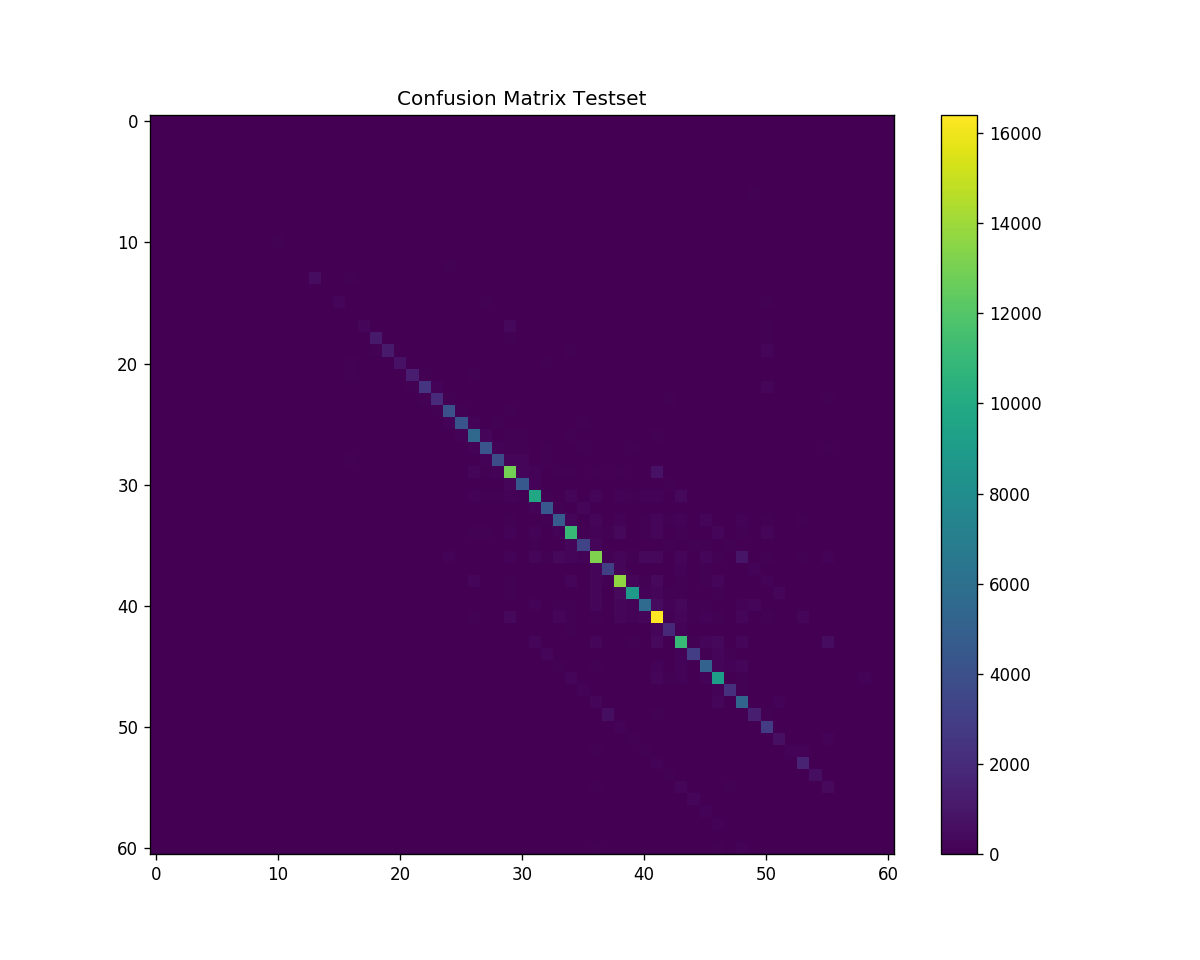

In [6]:
from utils import get_testset_confusion_matrix

confusion_matrix_testset = get_testset_confusion_matrix()
plt.figure('Confusion Matrix Testset', figsize = [10,8])
plt.imshow(confusion_matrix_testset[1:,1:], interpolation='nearest', aspect='auto'), plt.colorbar()
plt.title('Confusion Matrix Testset')
plt.show()
